In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Sales data for Tesla Model S from 2015 to 2023
sales_data = [18645, 24000, 26800, 29950, 14425, 20301, 11556, 90473, 19100]
years = np.arange(2015, 2024)

# Cumulative sales
cumulative_sales = np.cumsum(sales_data)

def bass_model(t, p, q, m):
    F = np.zeros_like(t)
    for i in range(1, len(t)):
        F[i] = F[i-1] + (p * (m - F[i-1]) + q * F[i-1] * (m - F[i-1]) / m)
    return np.diff(F, prepend=0)

# Curve fitting to estimate parameters
params, _ = curve_fit(bass_model, years, sales_data, bounds=(0, [1, 1, 1e6]))

p, q, m = params
print(f"p: {p}, q: {q}, m: {m}")



p: 0.01908705257675281, q: 0.15963020584618887, m: 999999.9999917232


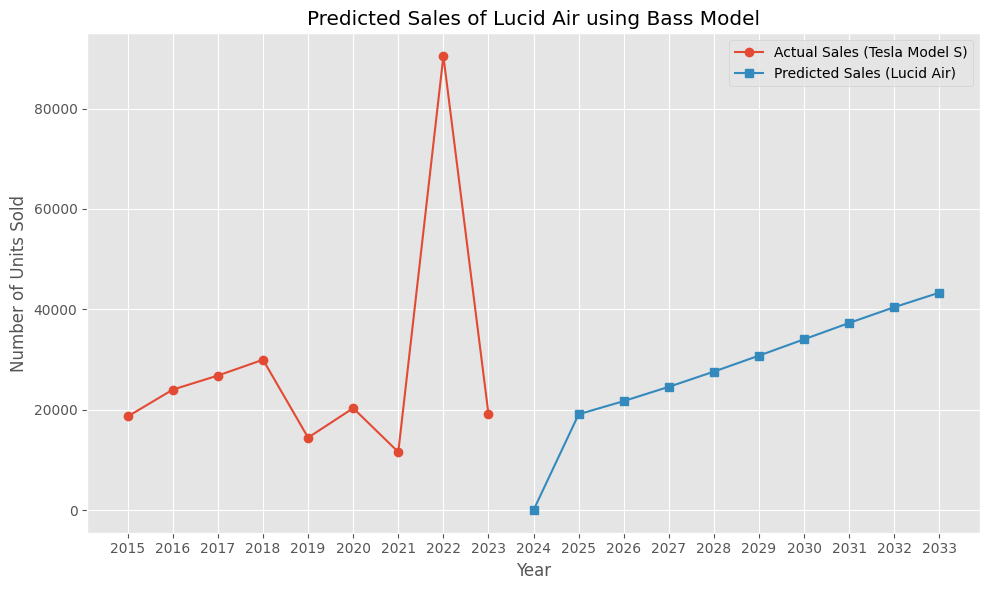

In [6]:
# Estimated Bass model parameters from previous step
p, q, m = params

future_years = np.arange(2024, 2034)

# Predict sales for the next 10 years
predicted_sales = bass_model(future_years, p, q, m)

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(years, sales_data, 'o-', label='Actual Sales (Tesla Model S)')
plt.plot(future_years, predicted_sales, 's-', label='Predicted Sales (Lucid Air)')
plt.xlabel('Year')
plt.ylabel('Number of Units Sold')
plt.title('Predicted Sales of Lucid Air using Bass Model')
plt.xticks(np.arange(2015, 2034))  # Set x-ticks to show integer years
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

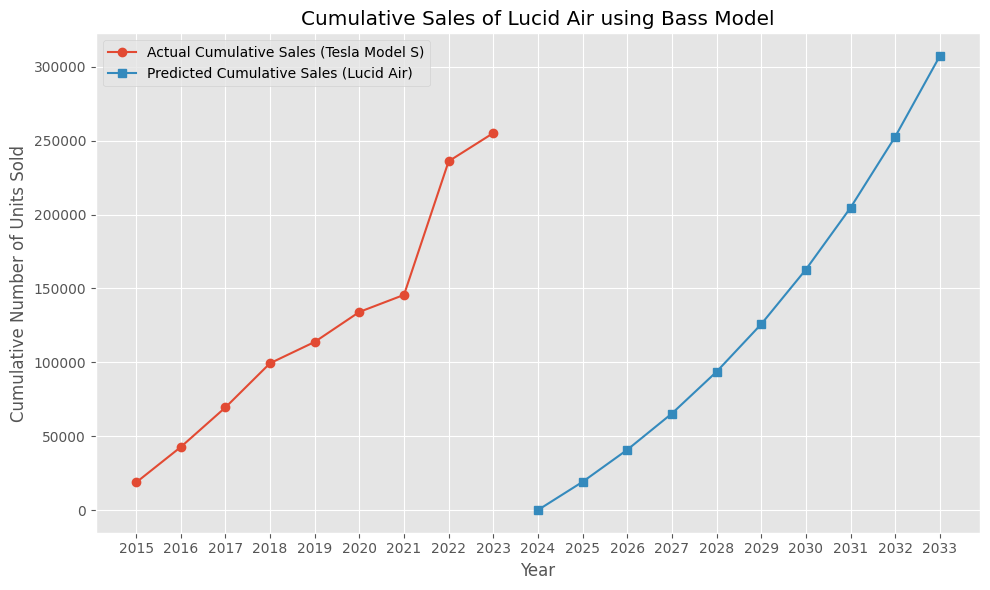

Potential market share is 5.0%


In [15]:
# Define the Bass model function for new adopters using the provided function
def bass_new_adopters(t, p, q, m):
    F = np.zeros_like(t)
    adopters = np.zeros_like(t)
    for i in range(1, len(t)):
        adopters[i] = p * m + (q - p) * F[i-1] - (q * F[i-1]**2) / m
        F[i] = F[i-1] + adopters[i]
    return adopters, F

# Predict sales and cumulative adopters for the next 10 years using the provided parameters
predicted_sales_lucid, cumulative_adopters_lucid = bass_new_adopters(future_years, p, q, m)

# Fermi estimation for potential market share
# Assuming 100 million car buyers globally each year
total_car_buyers = 100e6
# Assuming 5% are interested in luxury electric sedans like Lucid Air
luxury_electric_sedan_buyers = 0.05 * total_car_buyers
# Potential market share for Lucid Air
potential_market_share = luxury_electric_sedan_buyers / total_car_buyers

# Plot the predictions and cumulative adopters
plt.figure(figsize=(10,6))
plt.plot(years, np.cumsum(sales_data), 'o-', label='Actual Cumulative Sales (Tesla Model S)')
plt.plot(future_years, cumulative_adopters_lucid, 's-', label='Predicted Cumulative Sales (Lucid Air)')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Units Sold')
plt.title('Cumulative Sales of Lucid Air using Bass Model')
plt.xticks(np.arange(2015, 2034))  # Set x-ticks to show integer years
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Potential market share is {potential_market_share * 100}%')  # Display the potential market share percentage
